In [394]:
%%file SIRD.m
function ypoint = SIRD(t,y)
 
  global beta gamma mu
 
  ypoint=zeros(size(y));
  ypoint(1) = -beta*y(1)*y(2);
  ypoint(2) = beta*y(1)*y(2)-(gamma+mu)*y(2);
  ypoint(3) = gamma*y(2);
  ypoint(4) = mu*y(2);
  
end

Created file '/home/adrien.dauphin/TP3 SIR/SIRD.m'.



ans =

    0.0109    0.0000    0.8992    0.0899



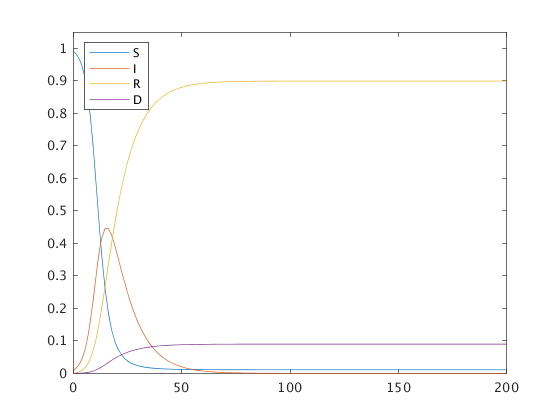

In [392]:
global beta gamma mu
 
% Paramètres
beta = 0.5 ;
gamma = 1/10 ;
mu = 0.01 ;
 
% Temps final
Tf = 200;
 
% Conditions initiales
y1 = 0.99;    
y2 = 1-y1;
y3 = 0;
y4 = 0;

[t,y] = ode45(@SIRD , [0 Tf], [y1 y2 y3 y4]); % Résolution
 
S = y(:,1);    % Extraction
I = y(:,2);
R = y(:,3);
D = y(:,4);

plot(t,S,t,I,t,R,t,D)
ylim([0 , 1.05])
legend('S','I','R','D','Location','northwest')


[ S(end) I(end) R(end) D(end) ]

In [380]:
url='https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-11-08.xlsx' ;
urlwrite(url,'updated_data.xlsx');

In [381]:
[I,TXT]=xlsread('updated_data.xlsx');
[i,j]=find(TXT=="France");
Mort = I(i,6); 
Cas = I(i,5);
Date = I(i, 2:4);
Cas = Cas(end:-1:1);
Date = Date(end:-1:1);
Mort = Mort(end:-1:1);



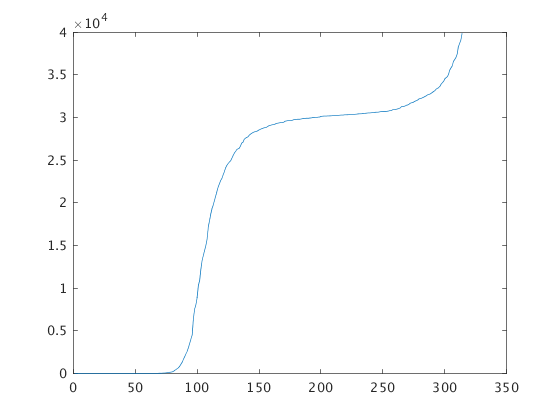

In [382]:
plot(cumsum(Mort))

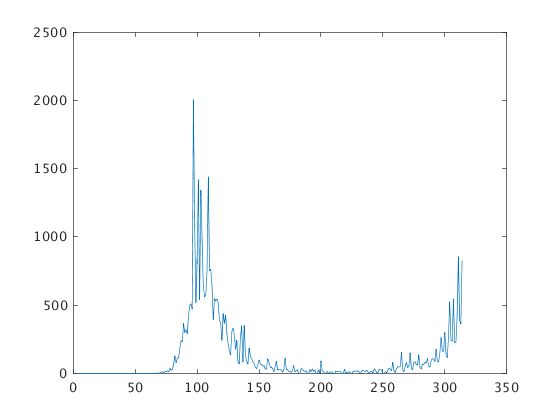

In [383]:
plot(Mort)

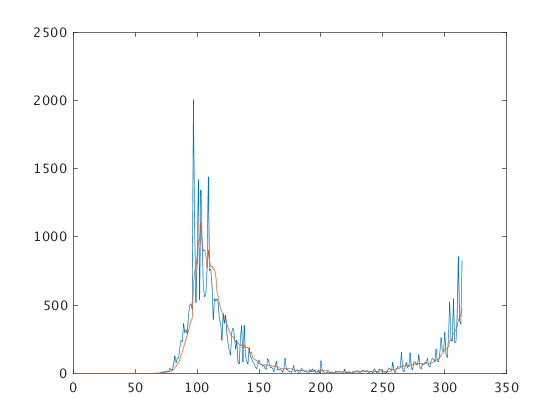

In [384]:
% moyenne mobile 7 jours;
MoyMobil=zeros(size(Mort));
for i=1:length(Mort)
    MoyMobil(i)=mean(Mort(max(1,i-6):i));
end
plot(1:length(Mort),Mort,1:length(Mort),MoyMobil)

In [385]:
%%file normeL2.m
function out = normeL2(param)
    
    global gamma beta mu Mort1 Tf I0

    % Paramètres
    gamma = 1/14 ;
    beta = param(1) ;
    mu = param(2)*10^(-5);
    

    % Conditions initiales
    y2 = I0/67012883;    
    y1 = 1-y2;
    y3 = 0;
    y4 = 0;

    [t,y] = ode45(@SIRD , [0:Tf], [y1 y2 y3 y4]);
    D = y(:,4);
    D = D(1:end) - [0 ; D(1:end-1) ];

    out = norm(D-Mort1);
  
end

Created file '/home/adrien.dauphin/TP3 SIR/normeL2.m'.



sol =

    0.2574    3.4453



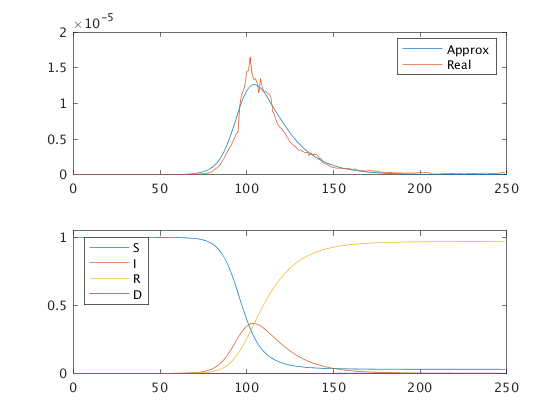

In [386]:
global Mort1 Tf I0
Mort1 = MoyMobil(1:250)/67012883;
Tf = length(Mort1) -1 ;
I0 = 1 ;

sol = fminsearch(@normeL2, [0.3 , 3])

% Paramètres
beta = sol(1) ;
gamma = 1/14 ;
mu = sol(2)*10^(-5) ;

 
% Conditions initiales
y2 = I0/67012883;    
y1 = 1-y2;
y3 = 0;
y4 = 0;

[t,y] = ode45(@SIRD , [0:Tf], [y1 y2 y3 y4]);
S = y(:,1);    % Extraction
I = y(:,2);
R = y(:,3);
D = y(:,4);
D_day = D(1:end) - [0 ; D(1:end-1) ];

subplot(2,1,1);
plot(t,D_day,t, Mort1)
legend('Approx','Real','Location','northeast')

subplot(2,1,2); 
plot(t,S,t,I,t,R,t,D)
ylim([0 , 1.05])
legend('S','I','R','D','Location','northwest')

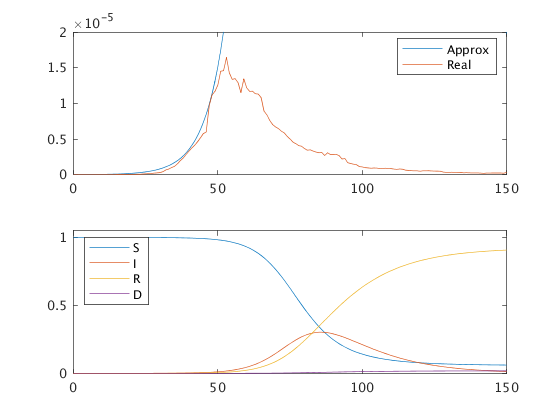

In [387]:
%Tests

global Mort1 Tf I0
Mort1 = MoyMobil(50:200)/67012883;
Tf = length(Mort1) -1 ;
I0 = 500 ;

% Paramètres
beta = 0.22;
gamma = 1/14 ;
mu =  0.02/14;
 
% Conditions initiales
y2 = I0/67012883;    
y1 = 1-y2;
y3 = 0;
y4 = 0;

[t,y] = ode45(@SIRD , [0:Tf], [y1 y2 y3 y4]);
S = y(:,1);    % Extraction
I = y(:,2);
R = y(:,3);
D = y(:,4);
D_day = D(1:end) - [0 ; D(1:end-1) ];

subplot(2,1,1);
plot(t,D_day, t,Mort1)
ylim([0 , 2*10^(-5)])
legend('Approx','Real','Location','northeast')

subplot(2,1,2); 
plot(t,S, t,I, t,R, t,D)
ylim([0 , 1.05])
legend('S','I','R','D','Location','northwest')

In [398]:
%%file SIRD_bt.m
function ypoint = SIRD_bt(t,y)
 
  global beta gamma mu
 
  ypoint=zeros(size(y));
  ypoint(1) = -beta(t)*y(1)*y(2);
  ypoint(2) = beta(t)*y(1)*y(2)-(gamma+mu)*y(2);
  ypoint(3) = gamma*y(2);
  ypoint(4) = mu*y(2);
  
end

Created file '/home/adrien.dauphin/TP3 SIR/SIRD_bt.m'.



beta =

  function_handle with value:

    @(t)interp1(0:4,[0,1,2,1,0],t)



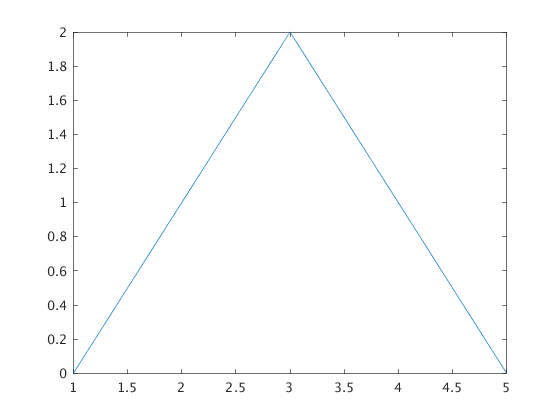

In [514]:
%%file normeL2_bt.m
function out = normeL2_bt(param)
    
    global gamma beta mu Mort1 Tf I0 T

    % Paramètres
    gamma = 1/14 ;
    T = linspace(0,150, length(param));
    beta =  @(t) interp1(T, param ,t) ;
    mu = 0.01/14;
    

    % Conditions initiales
    y2 = I0/67012883;    
    y1 = 1-y2;
    y3 = 0;
    y4 = 0;

    [t,y] = ode45(@SIRD_bt , [0:Tf], [y1 y2 y3 y4]);
    D = y(:,4);
    D = D(1:end) - [0 ; D(1:end-1) ];

    out = norm(D-Mort1);
  
end

Created file '/home/adrien.dauphin/TP3 SIR/normeL2_bt.m'.


In [538]:
beta_sol = fminsearch(@normeL2_bt,  0.2*ones(1,20));



beta =

  function_handle with value:

    @(t)interp1(T,beta_sol,t)



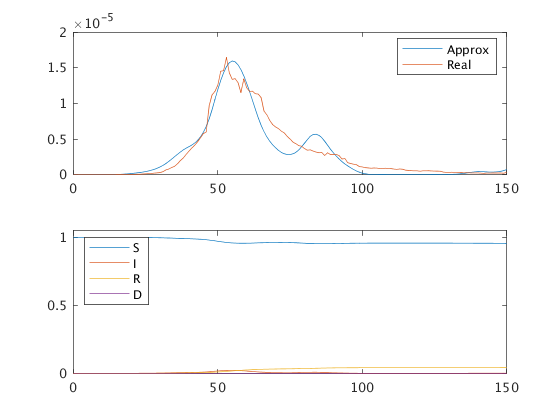

In [539]:
%Tests avec beta non constant

%beta_sol=[0.2 0.3 0.05 0 0]

global Beta T %valeur de beta aux temps T
T = linspace(0,150, length(beta_sol)) ;  % temps des valeurs de beta
beta = @(t) interp1(T, beta_sol, t)


global Mort1 Tf I0 gamma mu
Mort1 = MoyMobil(50:200)/67012883;
Tf = length(Mort1) -1 ;
I0 = 50 ;

% Paramètres
gamma = 1/14 ;
mu =  0.01/14;

% Conditions initiales
y2 = I0/67012883;    
y1 = 1-y2;
y3 = 0;
y4 = 0;

[t,y] = ode45(@SIRD_bt , [0:Tf], [y1 y2 y3 y4]);
S = y(:,1);    % Extraction
I = y(:,2);
R = y(:,3);
D = y(:,4);
D_day = D(1:end) - [0 ; D(1:end-1) ];

subplot(2,1,1);
plot(t,D_day, t,Mort1)
ylim([0 , 2*10^(-5)])
legend('Approx','Real','Location','northeast')

subplot(2,1,2); 
plot(t,S, t,I, t,R, t,D)
ylim([0 , 1.05])
legend('S','I','R','D','Location','northwest')

In [475]:
% Paramètres
gamma = 1/14 ;
T = 0:150;
beta =  @(t) interp1(T, beta_init ,t) ;
mu = 0.01/14;

In [518]:
ones(15,1)


ans =

     1
     1
     1
     1
     1
     1
     1
     1
     1
     1
     1
     1
     1
     1
     1

